In [2]:
import requests
from addict import Dict
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Result = namedtuple('Result', ['wall_time','step','value'])
base_url="http://bigboss:9849/data/plugin/scalars/scalars"

In [17]:
metric_names = ("eval_average_accuracy_model_for_curriculum_idx", "train_running_average_accuracy_model_idx_")
levels = tuple(map(str, range(0, 20)))
current_task_metric = "train_running_average_accuracy_model_idx_"
tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"
model_to_name_dict = {}
# model_to_name_dict["128"] = "128"
model_to_name_dict["256"] = "large"
model_to_name_dict["128_gem_net2net_256"] = "small+gem+net2net"
model_to_name_dict["256_gem"] = "large+gem"
model_to_name_dict["128_net2net_256"] = "small+net2net"
model_to_name_dict["128_gem_net2net"] = "small+gem+net2net"
model_to_name_dict["128_net2net"] = "small+net2net"
break_index = {"128": 8,
               "128_gem": 6}

# model_to_label_map = {
#     "128": "Lstm-128",
#     "128_gem": "Lstm-128-Gem",
#     "128_net2net_256": "Lstm-128-Net2Net", 
#     "128_gem_net2net_256": "Lstm-128-Gem-Net2Net", 
#     "256": "Lstm-256", 
#     "256_gem": "Lstm-256-Gem"
# }

model_to_label_map = {
    "128": "small-Lstm",
    "128_gem": "small-Lstm-Gem",
    "128_net2net_256": "small-Lstm-Net2Net", 
    "128_net2net": "small-Lstm-Net2Net", 
    "128_gem_net2net_256": "small-Lstm-Gem-Net2Net", 
    "128_gem_net2net": "small-Lstm-Gem-Net2Net", 
    "256": "large-Lstm", 
    "256_gem": "large-Lstm-Gem"
}

In [18]:
model_names = ("128_net2net", "128_gem_net2net", "256", "256_gem")
metric = current_task_metric
level = 0
color_map = {
    '128_gem_net2net_256': 'tab:blue',
    '128_gem_net2net': 'tab:blue',
    '128_net2net_256': 'tab:orange',
    '128_net2net': 'tab:orange',
    '256': 'tab:green',
    '256_gem': 'tab:red',
    '128': 'tab:purple', 
    '128_gem': 'tab:brown'
}

In [19]:
def get_result_for_model(task, model, metric, level):
    params = Dict()
    if task:
        params.run = "{}/{}".format(task, model)
    else:
        params.run = model
    params.tag = "{}{}".format(metric, level)
    r = requests.get(base_url, params)
    if(r.status_code!=200):
        print(r.url)
#         print("Error")
        return None
    result = list(map(lambda x: Result(*x), r.json()))
    return result

def get_current_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=current_task_metric, level=level)
    if result:
        return result[-1]
    else:
        None
        
def get_current_performance_for_all_models_all_levels(task):
    current_task_performance = {}
    for m in model_names:
        current_task_performance[m] = {}
        for l in levels:
            res = get_current_task_accuracy(task, m, l)
            if res:
                current_task_performance[m][l] = res
            else:
                break
    return current_task_performance


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net&tag=train_running_average_accuracy_model_idx_7
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=train_running_average_accuracy_model_idx_5


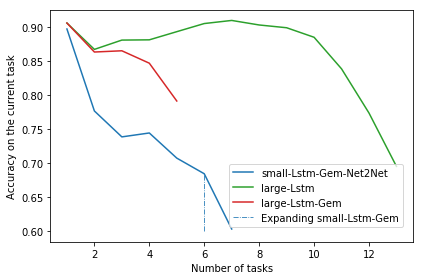

<Figure size 432x288 with 0 Axes>

In [31]:
def generate_current_accuracy_plots(task):
    
    current_task_performance = get_current_performance_for_all_models_all_levels(task)
    
    model_names = ("128_gem_net2net", "256", "256_gem")
    
    for m in model_names:
        y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
        x = list(range(1, len(y)+1))
        plt.plot(x, y, label=model_to_label_map[m], color=color_map[m])
        plt.xlabel("Number of tasks")
        plt.ylabel("Accuracy on the current task")
    
    plt.plot([6, 6], [0.6, 0.6845], '-.', color = 'tab:blue', lw=0.8, label="Expanding small-Lstm-Gem")
#     plt.plot([9, 9], [0.72, 0.7555], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
    plt.legend(loc='center left', bbox_to_anchor=(0.48, 0.2))
#     plt.legend(loc='center left')
    file_name = "{}_{}".format(task, "current_accuracy")
    plt.tight_layout()
#     plt.savefig("ssmnist_current_acc")
    plt.savefig('ssmnist_current_acc.pdf', format='pdf', dpi=1000)
    plt.show()
    plt.clf()

generate_current_accuracy_plots("cpu/ssmnist")
# generate_current_accuracy_plots("cpu/ssmnist")

In [21]:
# def generate_current_accuracy_plots(task):
    
#     current_task_performance = get_current_performance_for_all_models_all_levels(task)
    
    
#     for m in model_names:
#         y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
#         x = list(range(1, len(y)+1))
#         plt.plot(x, y, label=m, color=color_map[m])
#         plt.xlabel("Number of tasks")
#         plt.ylabel("Accuracy on the current task")
    
#     plt.plot([6, 6], [0.6, 0.6845], '-.', color = 'tab:blue', lw=0.8, label="Expanding Lstm-128-Gem")
#     plt.plot([9, 9], [0.72, 0.7555], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
#     plt.legend(loc='center left', bbox_to_anchor=(0.48, 0.2))
# #     plt.legend(loc='center left')
#     file_name = "{}_{}".format(task, "current_accuracy")
#     plt.tight_layout()
#     plt.savefig("ssmnist_current_acc")
#     plt.show()
#     plt.clf()

# generate_current_accuracy_plots("cpu/ssmnist")

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx7
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx5
[0.3960000276565552, 0.44158346951007843, 0.48711106181144714, 0.5007375776767731, 0.48229663968086245, 0.5049229711294174, 0.5187002973897117, 0.5496714487671852, 0.5585244413879182, 0.5782040059566498, 0.5734055096452887, 0.5665731504559517]
128_net2net
0.5131442167556532
128_gem_net2net
0.830077304939429
256_gem
0.8292051963508129
sum_256_gem_cpu_ssmnist_previous_accuracy


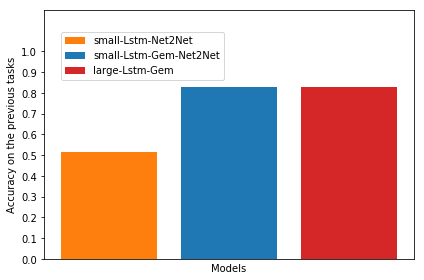

In [29]:
levels = tuple(map(str, range(1, 21)))
metric = tranfer_metric_name
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[:level]
    else:
        None

def get_previous_performance_for_all_models_all_levels(task):
    previous_task_performance = {}
    for m in model_names:
        previous_task_performance[m] = {}
        for l in levels:
            res = get_previous_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                previous_task_performance[m][l] = average_res
            else:
                break
    return previous_task_performance

def generate_previous_accuracy_plots(task):
    previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    
    print(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net"].items())))
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_gem_net2net"].items()))[:6]))]
    x = []
    y = []
    model_names = ("128_net2net", "128_gem_net2net", "256_gem")
    for m in model_names:
        
        if(previous_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
            x.append(m)
    
    if(use_mean):
        plt.ylim(0, 1)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        print(_x)
        print(_y)
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.7))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    if(use_mean):
        plt.ylim(0.0, 1.2)
    else:
        plt.ylim(0.0, 10)
    
    if(use_mean):
        plt.yticks(np.arange(0.0, 1.1, 0.1))
    else:
        plt.yticks(np.arange(0.0, 10.0, 0.5))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the previous tasks")
    plt.tight_layout()
    
    print(file_name)
    plt.savefig('prev_ssmnist.pdf', format='pdf', dpi=1000)
#     plt.savefig("prev_ssmnist")
#     plt.clf()
generate_previous_accuracy_plots(task="cpu/ssmnist")


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx7
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx5
sum_256_cpu_ssmnist_previous_accuracy
[0.22588423002089653, 0.2652029717816322, 0.37016560623306793]


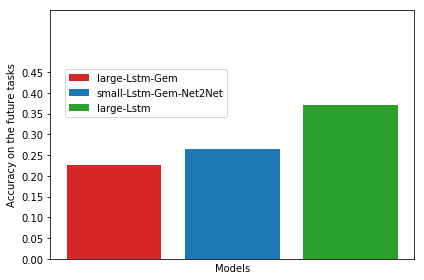

In [30]:
levels = tuple(map(str, range(0, 20)))

def get_future_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[level+1:20]
    else:
        None

def get_future_performance_for_all_models_all_levels(task):
    future_task_performance = {}
    for m in model_names:
        future_task_performance[m] = {}
        for l in levels:
            res = get_future_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                future_task_performance[m][l] = average_res
            else:
                break
    return future_task_performance

def generate_future_accuracy_plots(task):
    future_task_performance = get_future_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_net2net"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_gem_net2net"].items()))[:6]))]
    x = []
    y = []
    model_names = ("256_gem", "128_gem_net2net", "256", )
    
    for m in model_names:
        
        if(future_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance[m].items())))))
            x.append(m)
    if(use_mean):
        plt.ylim(0.5, 0.7)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.55))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    plt.ylim(0.0, 0.6)
    
    plt.yticks(np.arange(0.0, 0.5, 0.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the future tasks")
    plt.tight_layout()
    
    print(file_name)
#     plt.savefig("next_ssmnist_alt")
    plt.savefig('next_ssmnist.pdf', format='pdf', dpi=1000)
    print(y)
#     plt.clf()
generate_future_accuracy_plots(task="cpu/ssmnist")

In [11]:
future_task_performance = get_future_performance_for_all_models_all_levels(task)
future_task_performance

NameError: name 'task' is not defined

In [ ]:
task = "cpu/ssmnist"
m = "256_gem"
for l in levels:
    res = get_previous_task_accuracy(task, m, int(l))
    if res:
        average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
        print(average_res)
        previous_task_performance[m][l] = average_res
    else:
        break